# ISLR - Python: Applied 7 

- [Load Boston Dataset](#Load-Boston-Dataset)
- [Split Data](#Split-Data)
- [Build & Plot Random Forests Models](#Build-&-Plot-Random-Forests-Models)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
plt.style.use('ggplot')

## Load Boston Dataset

In [5]:
df = pd.read_csv('../../../data/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Split Data

In [8]:
# Get the predictors and the response values
X = df[df.columns[0:-1]].values # get all the columns except the medv
y = df['medv'].values

# The lab uses a 50/50 split. We'll do the same
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

## Build & Plot Random Forests Models

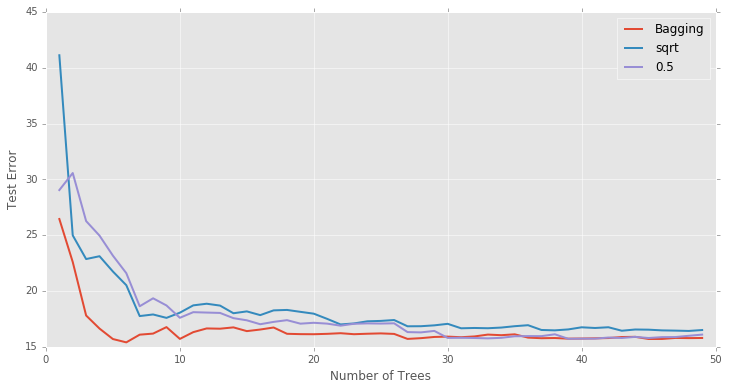

In [61]:
def forest_select(x_train, y_train, x_test, y_test, features_per_split=[None, 'sqrt', 0.5], trees=range(1,100)):
    """ 
    Forest_select constructs a series of random forests models varying both the features per split and the number 
    of trees. A plot is generated of the test error rate as a function of these variables.
    
    Parameters: 
        x_train, x_test, y_train, y_test : data split into train and validation sets
        features_per_split : a list of strs/ints ex: ['sqrt', 'log2', int] (see sklearn doc for randomForest)
        trees : array of ints for number of trees to use in each forest model.
    """
    errors = np.zeros((len(trees), len(features_per_split)))

    fig, ax = plt.subplots(1,1, figsize=(12,6))
    
    for idx, sample in enumerate(features_per_split):
        temp=[]
        
        for cnt in trees:
            # construct a forest with this number of trees
            forest_est = RandomForestRegressor(n_estimators=cnt, criterion='mse', max_features=sample, 
                                           bootstrap=True, random_state=0).fit(X_train, y_train)
            # add the error for this tree count to a list
            temp.append(np.mean((forest_est.predict(X_test)-y_test)**2))
        
        # compute the errors for all these trees for this feature sampling
        errors[:,idx] =  temp
        
        if sample is None:
            # if the sampling is none then we are bagging. We change the name here.
            sample = 'Bagging'
            
        ax.plot(trees, errors[:,idx], linewidth=2, label=sample)
        
    ax.legend(loc='best')
    ax.set_xlabel('Number of Trees')
    ax.set_ylabel('Test Error')
    
    return errors
            
        
errors = forest_select(X_train, y_train, X_test, y_test, features_per_split=[None, 'sqrt', 0.5], 
                        trees=range(1,50))           
    

In the Boston Dataset Bagging performs better than the random forest model using the square root of the predictors per split. The difference may not be significant.